In [5]:
import build_data_vis

In [6]:
directory = build_data_vis.find_directory() + 'vis_buses/'

In [7]:
df_bus_dates = build_data_vis.sort_bus_by_date(directory, 'bus_1/')
print(df_bus_dates)


                                  Filename       DateRetrieved
0   13J0016_ProfileData_20170920063536.csv 2017-09-20 06:36:19
1   !3J0018_ProfileData_20170920082828.csv 2017-09-20 08:29:04
2   13J0016_ProfileData_20180320103531.csv 2018-03-20 10:36:30
3      0016_ProfileData_20180731061359.csv 2018-07-31 06:14:11
4      0016_ProfileData_20180731063048.csv 2018-07-31 06:30:55
5      0016_ProfileData_20180731064002.csv 2018-07-31 06:40:09
6   13J0016_ProfileData_20180920063036.csv 2018-09-20 06:30:57
7   13J0016_ProfileData_20180920063914.csv 2018-09-20 06:39:31
8   13j0016_ProfileData_20180920064815.csv 2018-09-20 06:48:27
9   13j0016_ProfileData_20180920070233.csv 2018-09-20 07:02:46
10  13J0016_ProfileData_20181022093417.csv 2018-10-22 09:34:57
11  13j0016_ProfileData_20181022100422.csv 2018-10-22 10:04:39
12  13j0016_ProfileData_20181205133509.csv 2018-12-05 13:35:24
13  13j0016_ProfileData_20181206062942.csv 2018-12-06 06:30:40
14  13j0016_ProfileData_20181226081031.csv 2018-12-26 0

In [8]:
no_of_files = df_bus_dates.shape[0]
print(no_of_files)


18


In [11]:
# Time of failure dictionary for single Bus:
import pandas as pd
mtf = {}
df_bus_dates = build_data_vis.sort_bus_by_date(directory, 'bus_1')
no_of_files = df_bus_dates.shape[0]
print(no_of_files)

# Initialize mtf dictionary with empty lists for each module
for i in range(1, 17):
    mtf.update({f'module no{i}': []})
print(mtf)

# Iterate over each module
for module in range(1, 17):
    module_df = build_data_vis.build_module_average_df(directory, 'bus_1', module)
    
    # Iterate over each file
    for i in range(no_of_files - 1):
        if module_df.iloc[i, 12] > module_df.iloc[i + 1, 12]:
            mtf[f'module no{module}'].append(round(module_df.iloc[i, 12]))
        elif module_df.iloc[i, 12] < module_df.iloc[i + 1, 12]:
            mtf_list = mtf[f'module no{module}']
            
            # If the list is empty or contains only one value, append the current value
            if len(mtf_list) == 0 or len(mtf_list) == 1:
                mtf_list.append(round(module_df.iloc[i + 1, 12]))
                
                # If the list now has two values and the second is greater than the first, keep only the second
                if len(mtf_list) == 2 and mtf_list[1] > mtf_list[0]:
                    mtf_list = [mtf_list[1]]
            else:
                # Update the last value of the list with the current value
                mtf_list[-1] = round(module_df.iloc[i + 1, 12])
            mtf[f'module no{module}'] = mtf_list

# Convert mtf dictionary to DataFrame
mtf_df = pd.DataFrame.from_dict(mtf, orient='index')
print(mtf_df)


18
{'module no1': [], 'module no2': [], 'module no3': [], 'module no4': [], 'module no5': [], 'module no6': [], 'module no7': [], 'module no8': [], 'module no9': [], 'module no10': [], 'module no11': [], 'module no12': [], 'module no13': [], 'module no14': [], 'module no15': [], 'module no16': []}
                    0
module no1   18699802
module no2   47370981
module no3   16399763
module no4   47370820
module no5   47371216
module no6   12838407
module no7   47371009
module no8   16399546
module no9   16399700
module no10  16399509
module no11  12838265
module no12  18699784
module no13  12838304
module no14  24741540
module no15  47370993
module no16  47370656


In [12]:
import numpy as np

# Calculate MTTF for each module
mttf = {}
for module, mtf_values in mtf.items():
    if mtf_values:  
        mttf[module] = np.mean(mtf_values)
    else:
        mttf[module] = np.nan  # Assign NaN if no values are present

# Convert MTTF dictionary to DataFrame
mttf_df = pd.DataFrame.from_dict(mttf, orient='index', columns=['MTTF'])
print(mttf_df)


                   MTTF
module no1   18699802.0
module no2   47370981.0
module no3   16399763.0
module no4   47370820.0
module no5   47371216.0
module no6   12838407.0
module no7   47371009.0
module no8   16399546.0
module no9   16399700.0
module no10  16399509.0
module no11  12838265.0
module no12  18699784.0
module no13  12838304.0
module no14  24741540.0
module no15  47370993.0
module no16  47370656.0


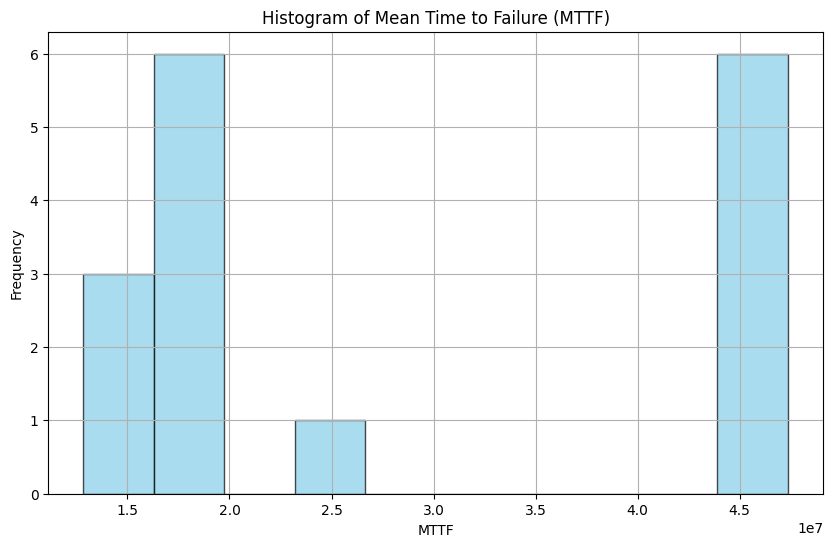

In [9]:
import matplotlib.pyplot as plt
# Plot histogram of MTTF
plt.figure(figsize=(10, 6))
plt.hist(mttf_df['MTTF'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('MTTF')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Time to Failure (MTTF)')
plt.grid(True)
plt.show()


In [13]:
#Time of Failure for all Buses (looping all buses):
import os

def calculate_time_of_failure(directory, bus_directory):
    mtf = {}
    df_bus_dates = build_data_vis.sort_bus_by_date(directory, bus_directory)
    no_of_files = df_bus_dates.shape[0]
    
    for i in range(1, 17):
        mtf.update({f'module no{i}': []})
    
    for module in range(1, 17):
        module_df = build_data_vis.build_module_average_df(directory, bus_directory, module)
        
        for i in range(no_of_files - 1):
            if module_df.iloc[i, 12] > module_df.iloc[i + 1, 12]:
                mtf[f'module no{module}'].append(round(module_df.iloc[i, 12]))
            elif module_df.iloc[i, 12] < module_df.iloc[i + 1, 12]:
                mtf_list = mtf[f'module no{module}']
                if len(mtf_list) == 0 or len(mtf_list) == 1:
                    mtf_list.append(round(module_df.iloc[i + 1, 12]))
                    if len(mtf_list) == 2 and mtf_list[1] > mtf_list[0]:
                        mtf_list = [mtf_list[1]]
                else:
                    mtf_list[-1] = round(module_df.iloc[i + 1, 12])
                mtf[f'module no{module}'] = mtf_list
    
    mtf_df = pd.DataFrame.from_dict(mtf, orient='index')
    return mtf_df

results = []
for file_index in range(1, 180):
    directory = './vis_buses1/'
    bus_directory = f'bus_{file_index}'
    path_dir = directory + bus_directory
    
    if os.path.exists(path_dir):
        result = calculate_time_of_failure(directory, bus_directory)
        results.append(result)
    else:
        pass

final_result = pd.concat(results, axis=1)

print(final_result)


                    0           0         0           0         0         0  \
module no1   18699802         NaN  16034979         NaN  37525881  32903018   
module no2   47370981  31181211.0  16034989         NaN  37526377  32902925   
module no3   16399763         NaN  16035023         NaN  37526206  32903196   
module no4   47370820  31180993.0  16035004  36472996.0  37526108  32903334   
module no5   47371216  31181382.0  16034995  36473356.0  37526106  32903300   
module no6   12838407  31181456.0  16034986         NaN  37526488  32903009   
module no7   47371009  31181045.0  16034955         NaN  37526240  32903135   
module no8   16399546  31181009.0  16034976  36470552.0  37525860  32903318   
module no9   16399700         NaN  16034898         NaN  37525863  32903039   
module no10  16399509  31181133.0  16035067  36343748.0  37515139  32892141   
module no11  12838265         NaN  16034998         NaN  37529999  32903213   
module no12  18699784  31181087.0  16034949         

In [14]:
# Calculate mean time of failure for each module
mean_time_of_failure = final_result.mean(axis=1)

# Calculate standard deviation of time of failure for each module
std_dev_time_of_failure = final_result.std(axis=1)

# Combine mean and standard deviation into a DataFrame
result_summary = pd.DataFrame({'Mean Time of Failure': mean_time_of_failure,
                               'Standard Deviation': std_dev_time_of_failure})

print(result_summary)

             Mean Time of Failure  Standard Deviation
module no1           2.709444e+07        9.296052e+06
module no2           3.255412e+07        1.023909e+07
module no3           2.663444e+07        9.855448e+06
module no4           3.311392e+07        9.463544e+06
module no5           3.337058e+07        8.791644e+06
module no6           2.760847e+07        1.047272e+07
module no7           3.293192e+07        9.400297e+06
module no8           2.949875e+07        8.561573e+06
module no9           2.805641e+07        9.478201e+06
module no10          2.948021e+07        8.544833e+06
module no11          2.746350e+07        1.041977e+07
module no12          2.883205e+07        8.230898e+06
module no13          2.799517e+07        9.615362e+06
module no14          3.156483e+07        7.553143e+06
module no15          3.336445e+07        1.021833e+07
module no16          3.337226e+07        8.792216e+06


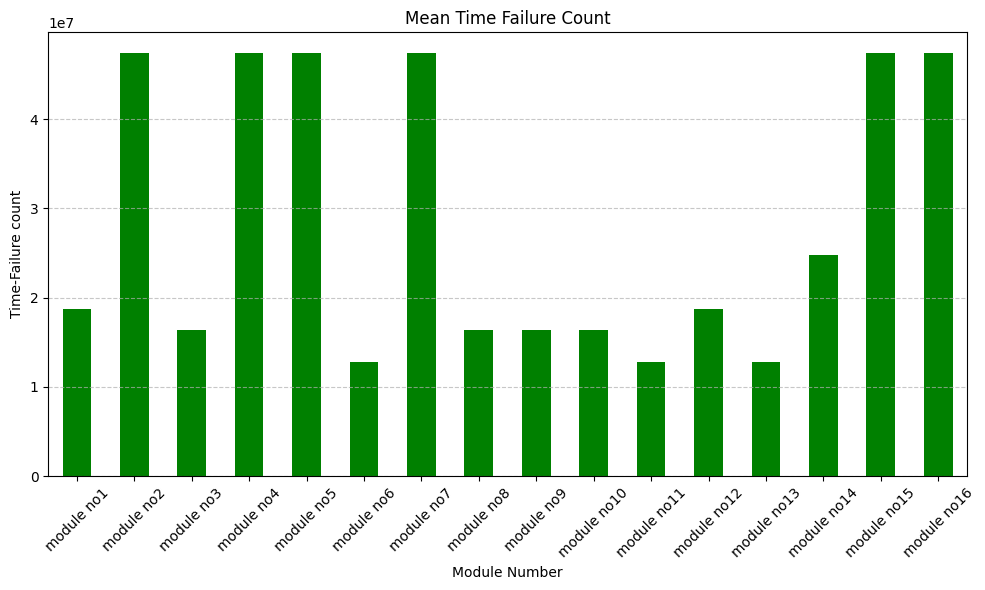

In [15]:
import matplotlib.pyplot as plt
mtf_df = mtf_df.transpose()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
mtf_df.sum().plot(kind='bar', color='green')
plt.title('Mean Time Failure Count')
plt.xlabel('Module Number')
plt.ylabel('Time-Failure count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/94/jwc2qn6n4hj08ykn9prl0dyc0000gn/T/ipykernel_1943/1899094811.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = mean_time_of_failure[i-1]  # Mean time of failure for the current module
/var/folders/94/jwc2qn6n4hj08ykn9prl0dyc0000gn/T/ipykernel_1943/1899094811.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = std_dev_time_of_failure[i-1]  # Standard deviation of time of failure for the current module


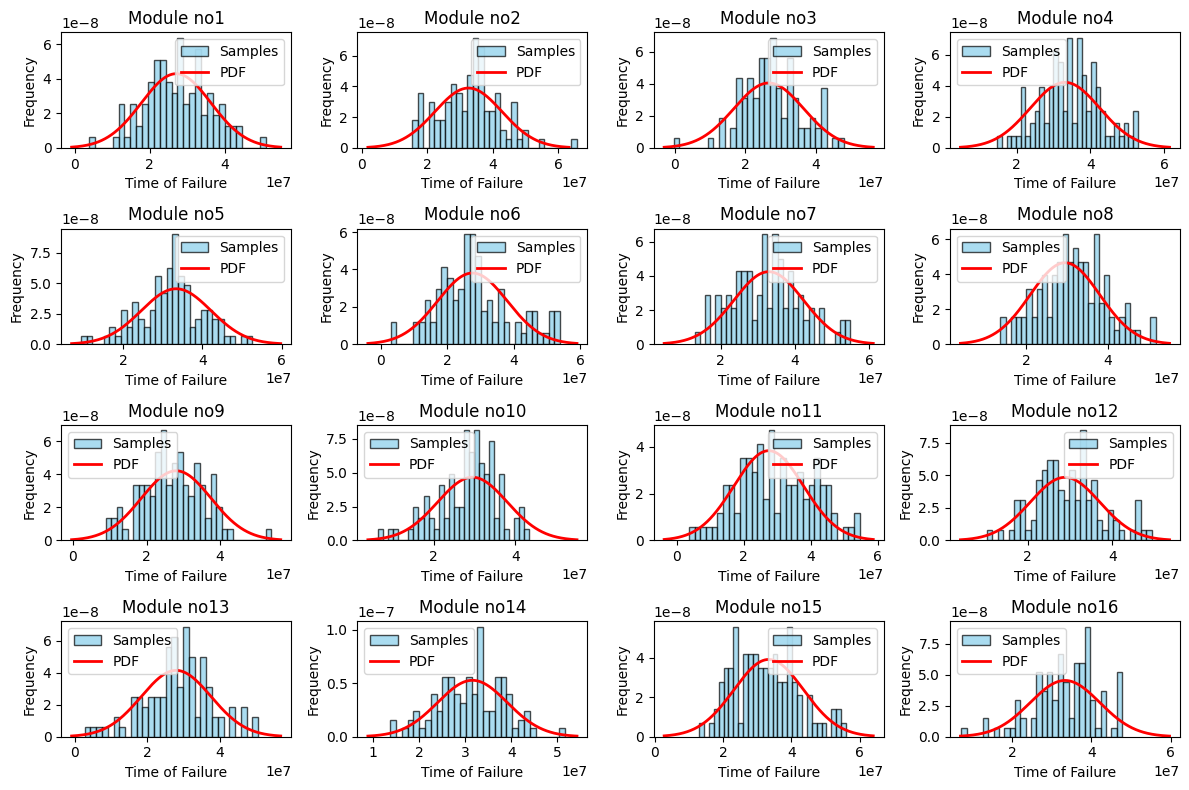

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

# Parameters for the Gaussian distribution
num_samples = 100  # Number of samples per module

# Initialize the figure
plt.figure(figsize=(12, 8))

# Loop through each module
for i in range(1, 17):
    mu = mean_time_of_failure[i-1]  # Mean time of failure for the current module
    sigma = std_dev_time_of_failure[i-1]  # Standard deviation of time of failure for the current module
    
    # Generate random samples from a Gaussian distribution based on mean and standard deviation
    samples = np.random.normal(mu, sigma, num_samples)
    
    # Plot the histogram of the samples
    plt.subplot(4, 4, i)
    plt.hist(samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Samples')
    
    # Plot the Gaussian Probability Density Function (PDF)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)  # Range of x values
    pdf = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))  # PDF formula
    plt.plot(x, pdf, color='red', linestyle='-', linewidth=2, label='PDF')
    
    plt.title(f'Module no{i}')
    plt.xlabel('Time of Failure')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


In [36]:
import numpy as np
from scipy.stats import f

# Generate two sample datasets
np.random.seed(0)
data1 = np.random.normal(loc=0, scale=1, size=100)
data2 = np.random.normal(loc=0, scale=2, size=100)

# Compute the variances of the two datasets
variance1 = np.var(data1, ddof=1)  # ddof=1 for unbiased estimator
variance2 = np.var(data2, ddof=1)

# Compute the F-statistic
F_statistic = variance1 / variance2

# Define degrees of freedom
df1 = len(data1) - 1
df2 = len(data2) - 1

# Compute the p-value using the F-distribution
p_value = f.cdf(F_statistic, df1, df2)

# Print results
print("F-statistic:", F_statistic)
print("p-value:", p_value)


F-statistic: 0.2372238797154728
p-value: 3.3513607742136574e-12


In [37]:
import numpy as np
from scipy.stats import chi2_contingency

# Create a contingency table (2x2)
observed = np.array([[10, 20],
                     [15, 25]])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)

# Print results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


Chi-square statistic: 0.011666666666666653
p-value: 0.9139858996305869
Degrees of freedom: 1
Expected frequencies:
 [[10.71428571 19.28571429]
 [14.28571429 25.71428571]]
